# Initialize 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline

# Reading a trajectory of 100 random control steps


In [3]:
traj_data = joblib.load("data/trajs/no_target_granular.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
actions = traj_data["actions"]
actions = np.array(actions)

print("Observation Shape: ",observations.shape)
print("Action Shape: ", actions.shape)
observations_split_scenes = observations
# observations_split_scenes = np.reshape(observations,(100,25,int(observations.shape[1]/25),2))
# #print("Split observations into separate scenes")
# print("Splitted observations shape: ",observations_split_scenes.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'data/trajs/no_target_granular.pkl'

# Plot the last frame of observation data

In [110]:
def plot_frame_scatter(idx):
    last_obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(5,5,figsize=(30,30))
    for i in range(5):
        for j in range(5):
            colors = np.random.rand(last_obs.shape[1]-4)
            axs[i,j].scatter(last_obs[i*5+j,0:-4,0],-last_obs[i*5+j,0:-4,1],c=colors)
#     return fig
def plot_frame_density(idx):
    last_obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(5,5,figsize=(30,30))    
    for i in range(5):
        for j in range(5):
            H,xedges,yedges = np.histogram2d(last_obs[i*5+j,0:-4,1],last_obs[i*5+j,0:-4,0],bins=[64,64],range=[[-2,2],[-2,2]])
            colors = np.random.rand(last_obs.shape[1])
            
            axs[i,j].imshow(H)
#     return fig

def plot_formatted_observation(idx):
    obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(2,2,figsize=(10,10))
#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

    for i in range(2):
        for j in range(2):
            center = obs[i*5+j,8:10]
#             target_map ,_,_= np.histogram2d(np.array([center[0]]),np.array([center[1]]),bins=[64,64],range=[[-2,2],[-2,2]])
#             print(target_map)
            print(center)
            ob = obs[i*5+j,10::]
            H = ob.reshape((64,64))
#             H=H**3
#             H=H**(0.2)
#             axs_target[i,j].imshow(target_map)
    
   
            axs[i,j].imshow(H)
#             axs_target[i,j].imshow(target_map)
#     return fig

def plot_formatted_observation_fixed_target(idx):
    obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(5,5,figsize=(10,10))
    
#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

    for i in range(5):
        for j in range(5):
            ob = obs[i*5+j,8::]
            H = ob.reshape((64,64))
#             H=H**3
#             H=H**(0.2)
#             axs_target[i,j].imshow(target_map)
    
            print(H.shape)
            axs[i,j].imshow(H)
#     return fig
def plot_formatted_obserbvation_target(idx):
    obs = observations_split_scenes[idx]
#     fig,axs = plt.subplots(2,2,figsize=(10,10))
    fig_target,axs_target = plt.subplots(2,2,figsize=(5,5))    

    for i in range(2):
        for j in range(2):
            center = obs[i*5+j,8:10]
            print(center)
            target_map ,_,_= np.histogram2d(np.array([center[1]]),np.array([center[0]]),bins=[64,64],range=[[-4,4],[-4,4]])
#             print(target_map)
#             H=H**3
#             H=H**(0.2)
            axs_target[i,j].imshow(target_map)

In [111]:
# plot_formatted_observation_fixed_target(0)

In [112]:
traj_data = joblib.load("data/trajs/curr_1_granular.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
observations_split_scenes = observations


[-1.5  1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
[1.5 1.5]


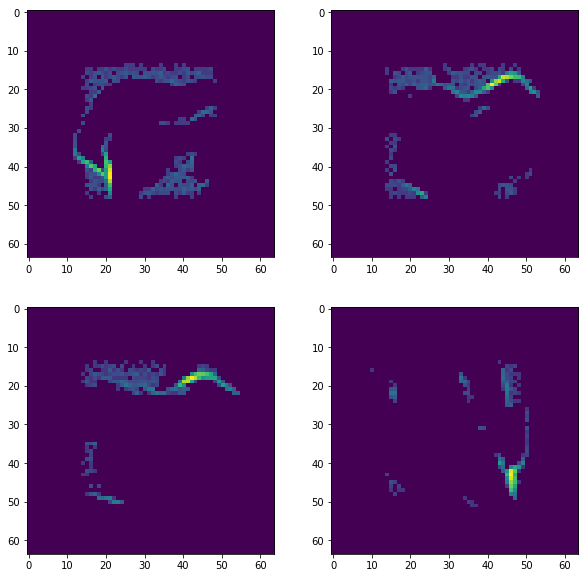

In [113]:
plot_formatted_observation(-1)



[-1.5  1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
[1.5 1.5]


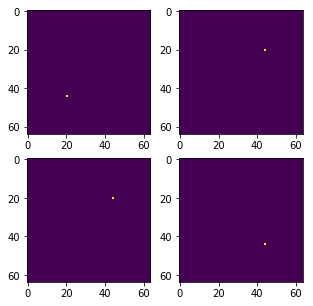

In [114]:
plot_formatted_obserbvation_target(-1)

# Interactive plot based on input frame

In [115]:
# w = widgets.IntSlider(min=0,max=observations_split_scenes.shape[0])

# interact(plot_formatted_observation, idx = w)


[-1.5  1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
[1.5 1.5]
[-1.5  1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
[1.5 1.5]


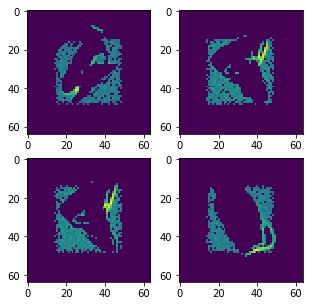

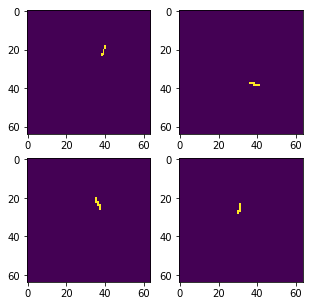

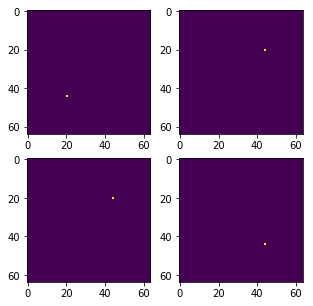

In [119]:
traj_data = joblib.load("data/trajs/granular_voxel_bar.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
observations_split_scenes = observations
def plot_observation_with_bar(idx):
    obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(2,2,figsize=(5,5))
    fig_bar,axs_bar = plt.subplots(2,2,figsize=(5,5))    

#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

    for i in range(2):
        for j in range(2):
            center = obs[i*5+j,8:10]
#             target_map ,_,_= np.histogram2d(np.array([center[0]]),np.array([center[1]]),bins=[64,64],range=[[-2,2],[-2,2]])
#             print(target_map)
            print(center)
            ob = obs[i*5+j,10::]
            particleDensity = ob[0:int(ob.shape[0]/2)]
            barDensity = ob[int(ob.shape[0]/2)::]

            H = particleDensity.reshape((64,64))
            bar = barDensity.reshape((64,64))
#             H=H**3
#             H=H**(0.2)
#             axs_target[i,j].imshow(target_map)
    
   
            axs[i,j].imshow(H)
            axs_bar[i,j].imshow(bar)
#             axs_target[i,j].imshow(target_map)
#     return fig
plot_observation_with_bar(-1)
plot_formatted_obserbvation_target(-1)

[1.5 1.5]
[-1.5 -1.5]
[-1.5 -1.5]
[1.5 1.5]
[1.5 1.5]
[-1.5 -1.5]
[-1.5 -1.5]
[1.5 1.5]


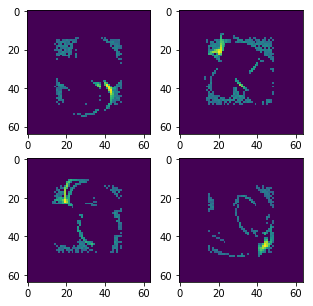

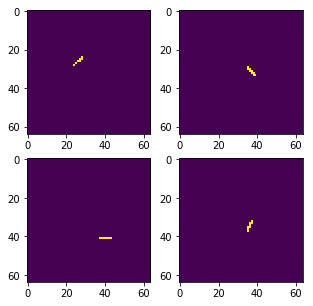

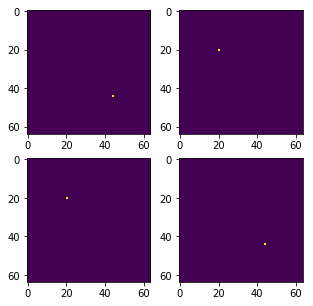

In [121]:
traj_data = joblib.load("data/trajs/granular_voxel_bar_two_goal.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
observations_split_scenes = observations

plot_observation_with_bar(-1)
plot_formatted_obserbvation_target(-1)

[-1.5  1.5]
[ 1.5 -1.5]
[1.5 1.5]
[-1.5  1.5]
[-1.5  1.5]
[ 1.5 -1.5]
[1.5 1.5]
[1.5 1.5]
[-1.5  1.5]
[-1.5 -1.5]
[-1.5  1.5]
[-1.5  1.5]
[-1.5  1.5]
[-1.5  1.5]
[ 1.5 -1.5]
[1.5 1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
[-1.5  1.5]
[-1.5 -1.5]
[1.5 1.5]
[-1.5 -1.5]
[ 1.5 -1.5]
[ 1.5 -1.5]
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)
(12288,)


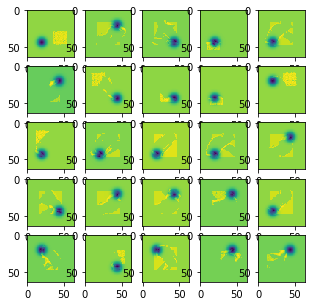

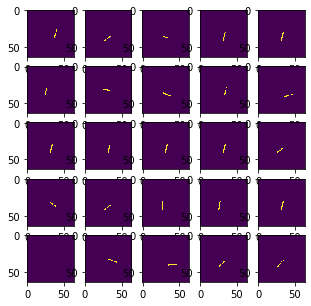

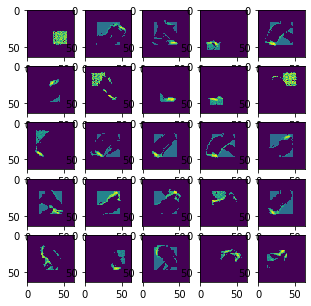

In [3]:
traj_data = joblib.load("data/trajs/granular_voxel_bar_goal_density_diff.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
observations_split_scenes = observations
def plot_observation_with_bar(idx):
    obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(5,5,figsize=(5,5))
    fig_bar,axs_bar = plt.subplots(5,5,figsize=(5,5))    

#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

    for i in range(5):
        for j in range(5):
            center = obs[i*5+j,8:10]
#             target_map ,_,_= np.histogram2d(np.array([center[0]]),np.array([center[1]]),bins=[64,64],range=[[-2,2],[-2,2]])
#             print(target_map)
            print(center)
            ob = obs[i*5+j,10::]
            particleDensity = ob[0:int(ob.shape[0]/3)]
            barDensity = ob[int(ob.shape[0]/3):int(ob.shape[0]/3*2)]

            H = particleDensity.reshape((64,64))
            bar = barDensity.reshape((64,64))
#             H=H**3
#             H=H**(0.2)
#             axs_target[i,j].imshow(target_map)
    
   
            axs[i,j].imshow(H)
            axs_bar[i,j].imshow(bar)
#             axs_target[i,j].imshow(target_map)
#     return fig
def plot_goal_density_from_obs(idx):
    obs = observations_split_scenes[idx]
#     fig,axs = plt.subplots(2,2,figsize=(10,10))
    fig_target,axs_target = plt.subplots(5,5,figsize=(5,5))    

    for i in range(5):
        for j in range(5):
            ob = obs[i*5+j,10::]
            print(ob.shape)
            goalDensity = ob[int(ob.shape[0]/3*2)::]
            particleDensity = ob[0:int(ob.shape[0]/3)]
            goal_map = goalDensity.reshape((64,64))
            H = particleDensity.reshape((64,64))
            axs_target[i,j].imshow((H+goal_map))
    
plot_observation_with_bar(-1)
plot_goal_density_from_obs(-1)

[0.  1.5]
[ 0.  -1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[ 0.  -1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[ 0.  -1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[ 0.  -1.5]
[0.  1.5]
[ 0.  -1.5]
[ 0.  -1.5]
[ 0.  -1.5]
[0.  1.5]
[ 0.  -1.5]
[0.  1.5]
[ 0.  -1.5]
[ 0.  -1.5]
[ 0.  -1.5]


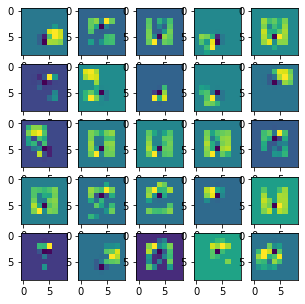

In [4]:
traj_data = joblib.load("data/trajs/granular_raw_img_2_goal_density_diff.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
observations_split_scenes = observations
def plot_observation_with_bar(idx):
    obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(5,5,figsize=(5,5))

#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

    for i in range(5):
        for j in range(5):
            center = obs[i*5+j,8:10]
#             target_map ,_,_= np.histogram2d(np.array([center[0]]),np.array([center[1]]),bins=[64,64],range=[[-2,2],[-2,2]])
#             print(target_map)
            print(center)
            ob = obs[i*5+j,10::]
            particleDensity = ob[0::]
#             barDensity = ob[int(ob.shape[0]/3):int(ob.shape[0]/3*2)]

            H = particleDensity.reshape((9,9))
#             bar = barDensity.reshape((9,9))
#             H=H**3
#             H=H**(0.2)
#             axs_target[i,j].imshow(target_map)
    
   
            axs[i,j].imshow(H)
#             axs_target[i,j].imshow(target_map)
#     return fig
# def plot_goal_density_from_obs(idx):
#     obs = observations_split_scenes[idx]
# #     fig,axs = plt.subplots(2,2,figsize=(10,10))
#     fig_target,axs_target = plt.subplots(5,5,figsize=(5,5))    

#     for i in range(5):
#         for j in range(5):
#             ob = obs[i*5+j,10::]
#             print(ob.shape)
#             goalDensity = ob[int(ob.shape[0]/3*2)::]
#             particleDensity = ob[0:int(ob.shape[0]/3)]
#             goal_map = goalDensity.reshape((9,9))
#             H = particleDensity.reshape((9,9))
#             axs_target[i,j].imshow((H+goal_map))
    
plot_observation_with_bar(-1)
# plot_goal_density_from_obs(-1)

[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]
[0.  1.5]


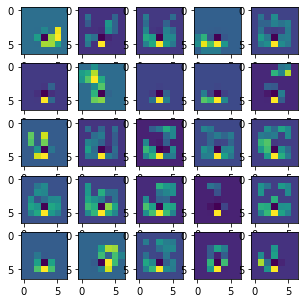

In [5]:
traj_data = joblib.load("data/trajs/granular_raw_img_goal_density_diff.pkl")
observations = traj_data["observations"]
observations = np.array(observations)
observations_split_scenes = observations
def plot_observation_with_bar(idx):
    obs = observations_split_scenes[idx]
    fig,axs = plt.subplots(5,5,figsize=(5,5))

#     fig_target,axs_target = plt.subplots(2,2,figsize=(10,10))    

    for i in range(5):
        for j in range(5):
            center = obs[i*5+j,8:10]
#             target_map ,_,_= np.histogram2d(np.array([center[0]]),np.array([center[1]]),bins=[64,64],range=[[-2,2],[-2,2]])
#             print(target_map)
            print(center)
            ob = obs[i*5+j,10::]
            particleDensity = ob[0::]
#             barDensity = ob[int(ob.shape[0]/3):int(ob.shape[0]/3*2)]

            H = particleDensity.reshape((7,7))
#             bar = barDensity.reshape((9,9))
#             H=H**3
#             H=H**(0.2)
#             axs_target[i,j].imshow(target_map)
    
   
            axs[i,j].imshow(H)
#             axs_target[i,j].imshow(target_map)
#     return fig
# def plot_goal_density_from_obs(idx):
#     obs = observations_split_scenes[idx]
# #     fig,axs = plt.subplots(2,2,figsize=(10,10))
#     fig_target,axs_target = plt.subplots(5,5,figsize=(5,5))    

#     for i in range(5):
#         for j in range(5):
#             ob = obs[i*5+j,10::]
#             print(ob.shape)
#             goalDensity = ob[int(ob.shape[0]/3*2)::]
#             particleDensity = ob[0:int(ob.shape[0]/3)]
#             goal_map = goalDensity.reshape((9,9))
#             H = particleDensity.reshape((9,9))
#             axs_target[i,j].imshow((H+goal_map))
    
plot_observation_with_bar(-1)
# plot_goal_density_from_obs(-1)